# Set of tools and function to use Matlab MEOP scripts within python

In [3]:
import meop_process
from pathlib import Path
import sys
import os
import shutil
import numpy as np
import pandas as pd
import xarray as xr

# Code to execute in a terminal

1. process a deployment:
>python meop_process.py --deployment ct107 --do_all
2. process a tag
>python meop_process.py --smru_name ct107-933-13 --do_all
3. help menu
>python meop_process.py -h

# Code to process data

## Initialize matlab

In [10]:
meop_process.start_matlab()

matlab already started
matlab already started
cd /media/disk2/roquet/MEOP_process;

PWD: /media/disk2/roquet/MEOP_process


In [5]:
meop_process.run_command('cd /media/disk2/roquet/MEOP_process')
meop_process.run_command('disp(config_id);');

cd /media/disk2/roquet/MEOP_process

disp(config_id);
jupyter_bpicard_pc207_linux



In [6]:
conf = meop_process.init_mirounga()

conf = init_mirounga;
Error using init_mirounga
Update information for new deployments in /media/disk2/roquet/MEOP_process/list_deployment.csv




## Import list of deployments

In [5]:
import meop_metadata
meop_metadata.read_list_deployment()

,PI_CODE,PROCESS,PUBLIC,COUNTRY,FIRST_VERSION,LAST_VERSION,START_DATE,END_DATE,START_DATE_JUL
DEPLOYMENT_CODE,,,,,,,,,
wd04,HINDELL,1,1,AUSTRALIA,MEOP-CTD_2016-07-12,MEOP-CTD_2020-01-02,03/26/0011,10/08/0011,4103.0
awru1,HINDELL,1,1,AUSTRALIA,MEOP-CTD_2015-05-31,MEOP-CTD_2020-01-02,02/12/0007,10/03/0007,2600.0
ct149,HINDELL,1,1,AUSTRALIA,MEOP-CTD_2020-01-02,MEOP-CTD_2020-01-02,12/20/0018,NaT,6929.0
ct2,HINDELL,1,1,AUSTRALIA,MEOP-CTD_2015-05-31,MEOP-CTD_2020-01-02,01/20/0004,08/01/0004,1481.0
ct36,HINDELL,1,1,AUSTRALIA,MEOP-CTD_2015-05-31,MEOP-CTD_2020-01-02,12/26/0008,03/01/0009,3283.0
...,...,...,...,...,...,...,...,...,...
rs36,HOLLAND,1,0,USA,NaN,NaN,NaT,NaT,NaN
ct169,COSTA,1,0,USA,NaN,NaN,NaT,NaT,NaN
sk3,BLOCK,1,0,USA,NaN,NaN,NaT,NaT,NaN


In [8]:
df = meop_metadata.read_list_deployment_hr()

In [10]:
df[df.smru_platform_code=='wd14-282-20']

,smru_platform_code,instr_id,year,period,continuous,prefix


## Process one tag

In [7]:
smru_name='wd14-282-20'
deployment='wd14'
meop_process.process_tags(smru_name=smru_name)

Process tag :wd14-282-20

conf = init_mirounga;



MatlabExecutionError: Reference to non-existent field 'invalid_code'.


In [9]:
meop_process.create_hr2(deployment=deployment)

Process deployment :ct160

conf = init_mirounga;

create_hr2(conf,EXP,one_smru_name);
Create hr2 version [by default, hr1 --> hr2]
  ct160-264-20: hr1 --> hr2



True

In [10]:
meop_process.generate_doc_latex(deployment=deployment)

conf = init_mirounga;

generate_plot2(conf,EXP,one_smru_name);
the MATLAB function has been cancelled



True

In [30]:
meop_process.generate_calibration_plots(smru_name=smru_name)

conf = init_mirounga;
config name: jupyter_froqu_pc207_linux

generate_plot1(conf,EXP,one_smru_name);
calibration plots: ct107-933-13



True

In [19]:
meop_process.stop_matlab()

# Controlling data

In [11]:
import meop_filenames
import meop
from importlib import reload
reload(meop) 

<module 'meop' from '/media/disk2/roquet/MEOP_process/python/meop.py'>

In [12]:
smru_name = 'ct160-264-20'
file_name = meop_filenames.fname_prof(smru_name,qf='lr0')

In [13]:
file_name.name.split('_')[0]

'ct160-264-20'

In [14]:
ds = meop.open_dataset(file_name)
ds.list_metadata().to_csv(file_name.parent / f'{smru_name}_header.csv')

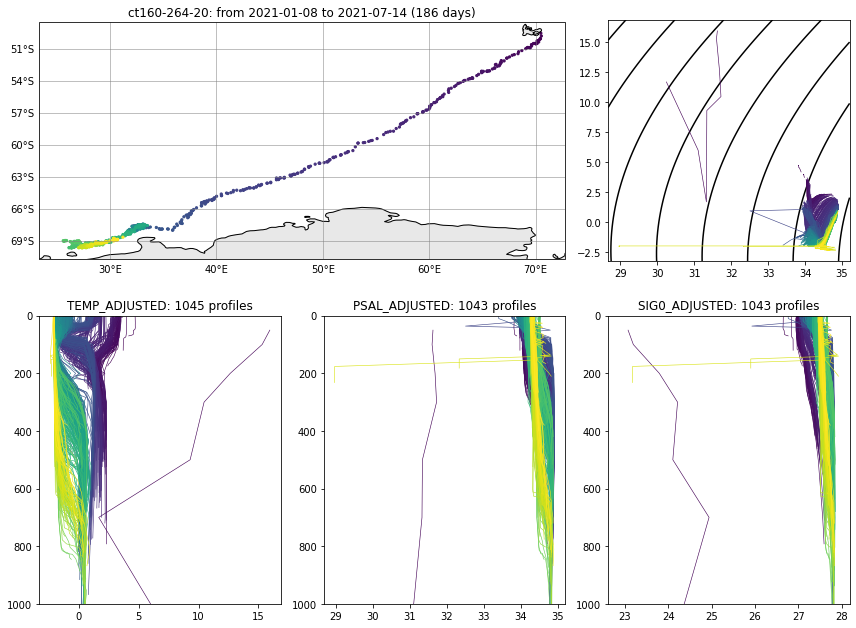

In [17]:
with meop.open_dataset(meop_filenames.fname_prof(smru_name,qf='lr0')) as ds:
    ds.plot_data_tags()

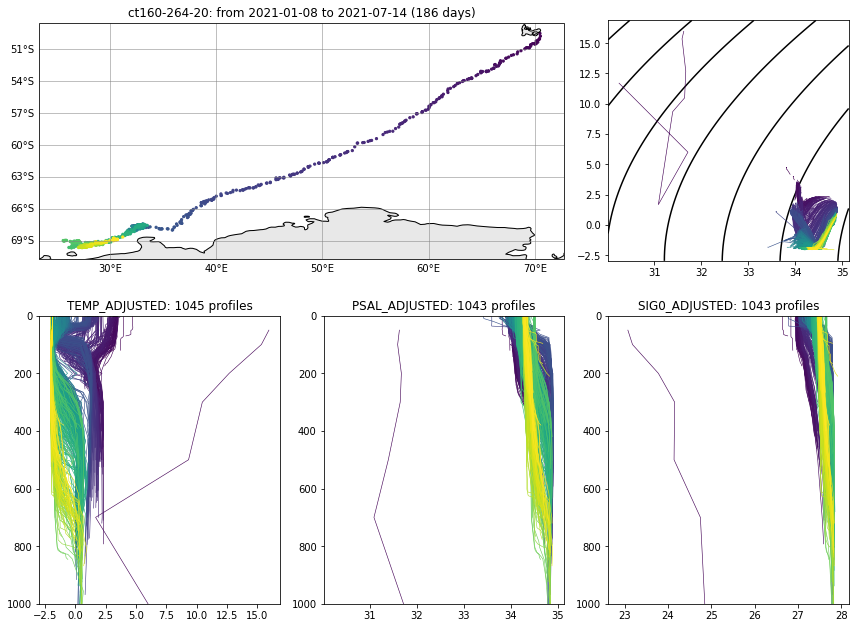

In [18]:
with meop.open_dataset(meop_filenames.fname_prof(smru_name,qf='lr1')) as ds:
    ds.plot_data_tags()

In [19]:
ds = ds.add_sigma0().add_interp('PRES').add_interp('TEMP').add_interp('PSAL').add_interp('SIG0')
ds

<xarray.Dataset>
Dimensions:                       (N_CALIB: 1, N_INTERP: 1000, N_LEVELS: 16, N_PARAM: 6, N_PROF: 1045)
Coordinates:
  * N_CALIB                       (N_CALIB) int64 0
  * N_LEVELS                      (N_LEVELS) int64 0 1 2 3 4 ... 11 12 13 14 15
  * N_PARAM                       (N_PARAM) int64 0 1 2 3 4 5
  * N_PROF                        (N_PROF) int64 0 1 2 3 ... 1041 1042 1043 1044
  * N_INTERP                      (N_INTERP) int64 0 1 2 3 4 ... 996 997 998 999
Data variables:
    DATA_TYPE                     object ...
    FORMAT_VERSION                object ...
    HANDBOOK_VERSION              object ...
    REFERENCE_DATE_TIME           object ...
    DATE_CREATION                 object ...
    DATE_UPDATE                   object ...
    PLATFORM_NUMBER               (N_PROF) object ...
    PROJECT_NAME                  (N_PROF) object ...
    PI_NAME                       (N_PROF) object ...
    STATION_PARAMETERS            (N_PROF, N_PARAM) object ...
    CYCLE_NUMBER                  (N_PROF) float64 ...
    DIRECTION                     (N_PROF) object ...
    DATA_CENTRE                   (N_PROF) object ...
    DC_REFERENCE                  (N_PROF) object ...
    DATA_STATE_INDICATOR          (N_PROF) object ...
    DATA_MODE                     (N_PROF) object ...
    INST_REFERENCE                (N_PROF) object ...
    WMO_INST_TYPE                 (N_PROF) object ...
    JULD                          (N_PROF) object 2021-01-08 16:40:00 ... 202...
    JULD_QC                       (N_PROF) object ...
    JULD_LOCATION                 (N_PROF) object 2021-01-08 16:40:00 ... 202...
    LATITUDE                      (N_PROF) float64 ...
    LONGITUDE                     (N_PROF) float64 70.49 70.53 ... 30.7 31.21
    POSITION_QC                   (N_PROF) object ...
    POSITIONING_SYSTEM            (N_PROF) object ...
    PROFILE_PRES_QC               (N_PROF) object ...
    PROFILE_PSAL_QC               (N_PROF) object ...
    PROFILE_TEMP_QC               (N_PROF) object ...
    PRES                          (N_PROF, N_LEVELS) float32 ...
    PRES_QC                       (N_PROF, N_LEVELS) object ...
    PRES_ADJUSTED                 (N_PROF, N_LEVELS) float32 4.0 10.0 ... 380.0
    PRES_ADJUSTED_QC              (N_PROF, N_LEVELS) object ...
    PRES_ADJUSTED_ERROR           (N_PROF, N_LEVELS) float32 ...
    TEMP                          (N_PROF, N_LEVELS) float32 ...
    TEMP_QC                       (N_PROF, N_LEVELS) object ...
    TEMP_ADJUSTED                 (N_PROF, N_LEVELS) float32 4.7105427 ... -0...
    TEMP_ADJUSTED_QC              (N_PROF, N_LEVELS) object b'1' b'1' ... b'1'
    TEMP_ADJUSTED_ERROR           (N_PROF, N_LEVELS) float32 ...
    PSAL                          (N_PROF, N_LEVELS) float32 ...
    PSAL_QC                       (N_PROF, N_LEVELS) object ...
    PSAL_ADJUSTED                 (N_PROF, N_LEVELS) float32 33.816204 ... 34...
    PSAL_ADJUSTED_QC              (N_PROF, N_LEVELS) object b'1' b'1' ... b'1'
    PSAL_ADJUSTED_ERROR           (N_PROF, N_LEVELS) float32 ...
    PROFILE_CHLA_QC               (N_PROF) object ...
    CHLA                          (N_PROF, N_LEVELS) float32 ...
    CHLA_QC                       (N_PROF, N_LEVELS) object ...
    CHLA_ADJUSTED                 (N_PROF, N_LEVELS) float32 ...
    CHLA_ADJUSTED_QC              (N_PROF, N_LEVELS) object ...
    CHLA_ADJUSTED_ERROR           (N_PROF, N_LEVELS) float32 ...
    PROFILE_DOXY_QC               (N_PROF) object ...
    DOXY                          (N_PROF, N_LEVELS) float32 ...
    DOXY_QC                       (N_PROF, N_LEVELS) object ...
    DOXY_ADJUSTED                 (N_PROF, N_LEVELS) float32 ...
    DOXY_ADJUSTED_QC              (N_PROF, N_LEVELS) object ...
    DOXY_ADJUSTED_ERROR           (N_PROF, N_LEVELS) float32 ...
    PROFILE_LIGHT_QC              (N_PROF) object ...
    LIGHT                         (N_PROF, N_LEVELS) float32 ...
    LIGHT_QC                 

(<Figure size 720x720 with 6 Axes>,
 array([<matplotlib.axes._subplots.AxesSubplot object at 0x7f91b3535b50>,
       dtype=object))

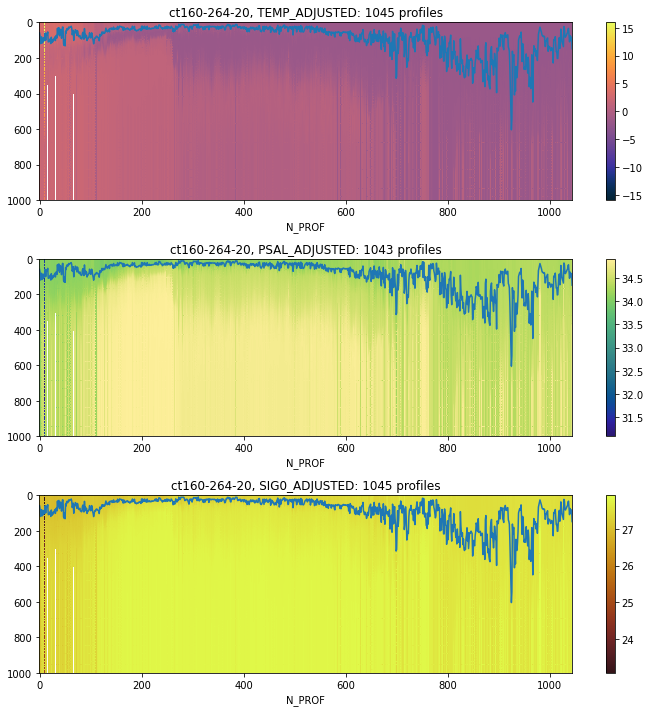

In [21]:
ds.plot_sections(['TEMP','PSAL','SIG0'],rolling=1,density_threshold=0.1)